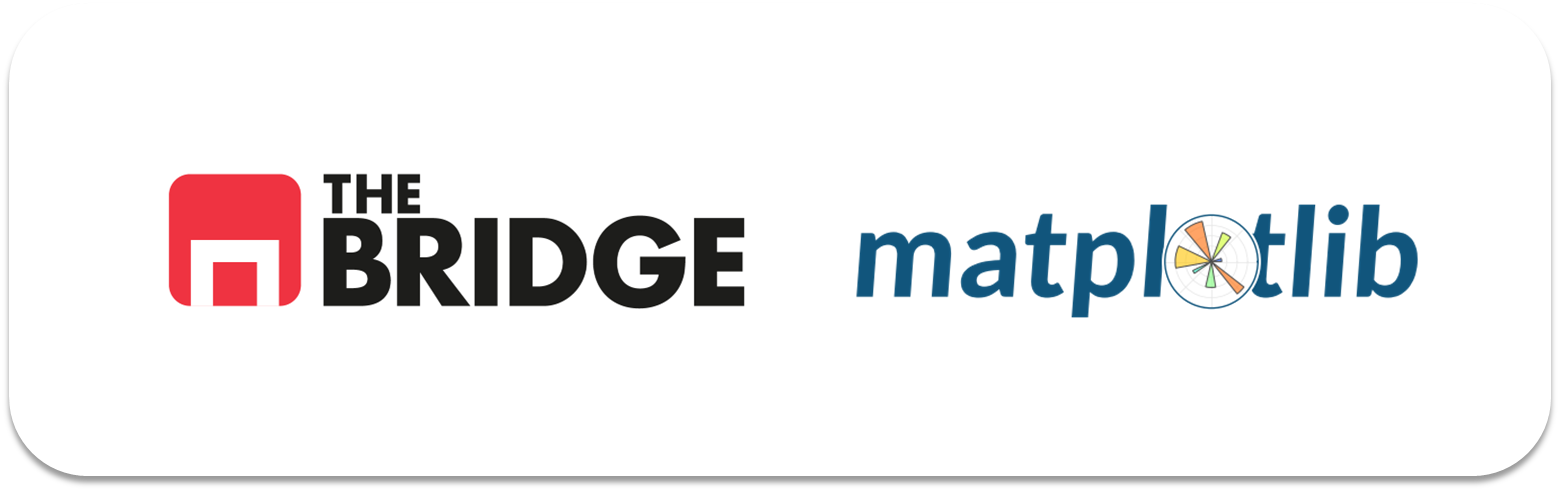

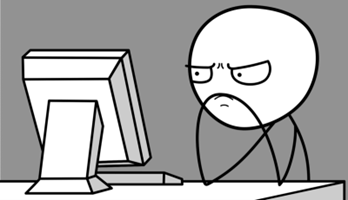

Para ejercitarte y afianzar lo aprendido sobre gráficas de Matplotlib, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Ejercicio 1


Carga tu querido dataset del titanic, en la ruta "./data/titanic.csv", no hace falta que hagas limpieza.

In [44]:
df_titanic=pd.read_csv("./data/titanic.csv")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Ejercicio 2



Crea el histograma de la variable `age` de forma que se reproduzca la siguiente figura (tiene 30 bines)

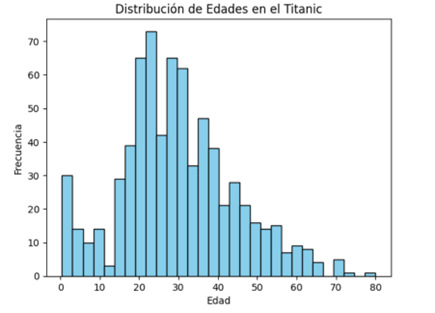

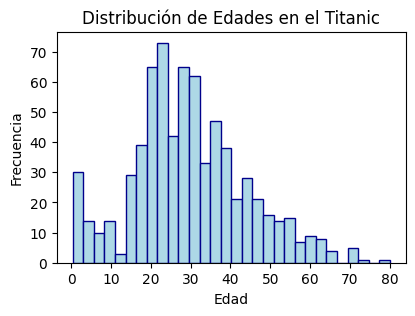

In [45]:
fig = plt.figure(figsize=(4.5,3))
plt.hist(df_titanic["age"], bins = 30, color = "lightblue", edgecolor= "darkblue");
plt.xticks(np.arange(0,90,10));
plt.title("Distribución de Edades en el Titanic");
plt.xlabel("Edad");
plt.ylabel("Frecuencia");

### Ejercicio 3

¿Cuáles son los 3 intervalos de valores con mayor número de viajeros según el gráfico anterior? ¿Obtén también el número de viajeros en cada uno?

In [46]:
data = df_titanic["age"] #lo guardo en una variable para no andar escribiendo todo el rato
bins = np.arange(1,100,10)

hist, edges = np.histogram(data, bins = bins)

# Encontrar los 3 intervalos con mayor frecuencia
top_3_indices = np.argsort(hist)[-3:][::-1]  # Índices de los 3 intervalos mayores
top_3_intervals = [(edges[i], edges[i + 1]) for i in top_3_indices]  # Intervalos correspondientes
top_3_frequencies = [hist[i] for i in top_3_indices]  # Frecuencias correspondientes

# Mostrar resultados
for i, (interval, freq) in enumerate(zip(top_3_intervals, top_3_frequencies), 1):
    print(f"Intervalo {i}: {interval[0]}-{interval[1]} años, {freq} viajeros")

Intervalo 1: 21-31 años, 231 viajeros
Intervalo 2: 31-41 años, 155 viajeros
Intervalo 3: 11-21 años, 116 viajeros


### Ejercicio 4

Obten el diagrama de caja del precio del billete usando las funciones de matplotlib y reproduciendo la siguiente figura (tendrás que bucear un poco en los parámetros, y usar patch_artist = True, el tamaño de los bigotes está ajustado a 3 IQRs):

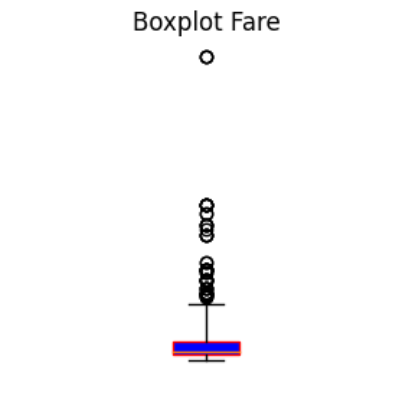

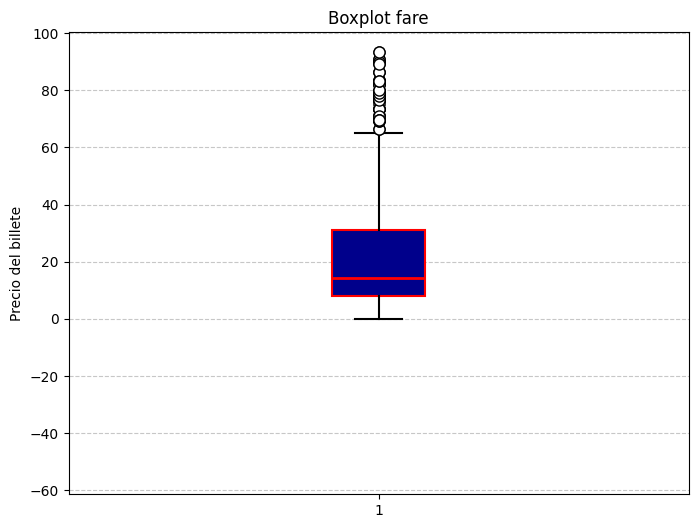

In [47]:
# Extraer la columna "fare" del dataframe
fare = df_titanic["fare"].dropna()  # Eliminar valores NaN

# Calcular los límites de los bigotes (3 IQR)
q1 = np.percentile(fare, 25)  # Primer cuartil (Q1)
q3 = np.percentile(fare, 75)  # Tercer cuartil (Q3)
iqr = q3 - q1  # Rango intercuartil
lower_whisker = q1 - 3 * iqr
upper_whisker = q3 + 3 * iqr

# Crear el diagrama de caja
plt.figure(figsize=(8, 6))
box = plt.boxplot(fare, 
                  patch_artist=True,  # Permitir personalización del color de la caja
                  flierprops={"marker": "o", "markersize": 8, "markerfacecolor": "white", "markeredgecolor" : "black"},
                  whiskerprops={"color": "black", "linewidth": 1.5}, 
                  capprops={"color": "black", "linewidth": 1.5},
                  boxprops={"facecolor": "darkblue", "edgecolor": "red", "linewidth" : 1.5, "color": "red"},
                  medianprops={"color": "red", "linewidth": 2})

# Ajustar los límites de los bigotes a 3 IQRs
plt.ylim(lower_whisker, upper_whisker)

# Etiquetas y título
plt.title("Boxplot fare")
plt.ylabel("Precio del billete")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Cuadrícula opcional para facilitar la lectura

# Mostrar la figura
plt.show()

### Ejercicio 5

Crea el gráfico de frecuencias absolutas y relativas de las ciudades de embarque del Titanic de forma que repodruzcan la siguiente figura:

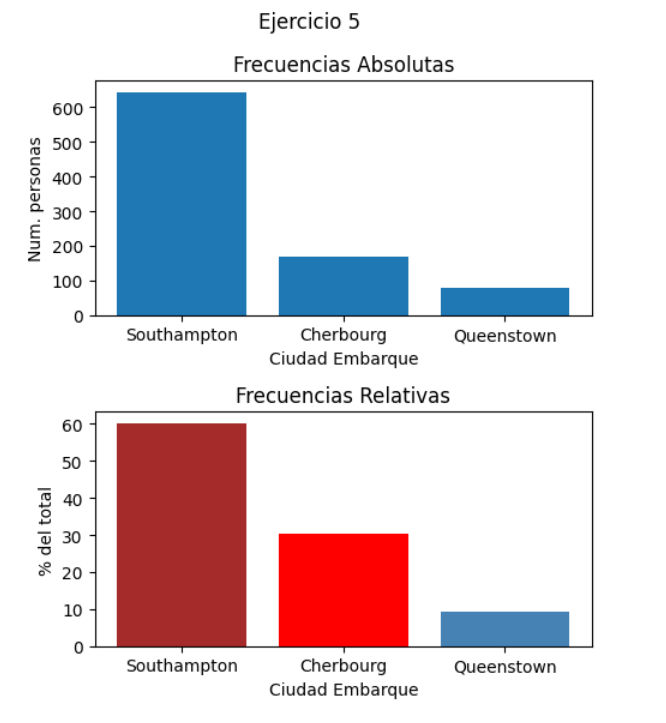

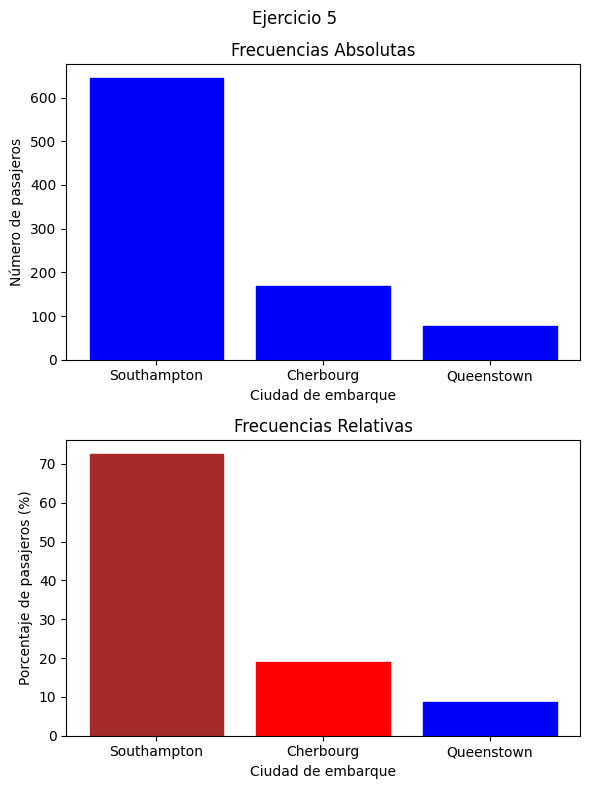

In [48]:
ciudades = df_titanic["embark_town"].dropna()  # Eliminar valores NaN

# Calcular frecuencias absolutas y relativas
absolute_frequencies = ciudades.value_counts()  # Frecuencias absolutas
relative_frequencies = ciudades.value_counts(normalize=True) * 100  # Frecuencias relativas en porcentaje

# Crear los gráficos
fig, axes = plt.subplots(2, 1, figsize=(6, 8))
fig.suptitle ("Ejercicio 5")

# Gráfico de frecuencias absolutas
axes[0].bar(absolute_frequencies.index, absolute_frequencies.values, color="blue", edgecolor="blue")
axes[0].set_title("Frecuencias Absolutas")
axes[0].set_ylabel("Número de pasajeros")
axes[0].set_xlabel("Ciudad de embarque")

# Gráfico de frecuencias relativas
axes[1].bar(relative_frequencies.index, relative_frequencies.values, color= ["brown", "red", "blue"], edgecolor=["brown", "red", "blue"])
axes[1].set_title("Frecuencias Relativas")
axes[1].set_ylabel("Porcentaje de pasajeros (%)")
axes[1].set_xlabel("Ciudad de embarque")

# Ajustar diseño y mostrar los gráficos
plt.tight_layout()
plt.show()


### Ejercicio 6

Crea el gráfico de dispersión entre el precio y la edad, de forma que reproduzca el siguiente gráfico (tendrás que emplear el argumento alpa)

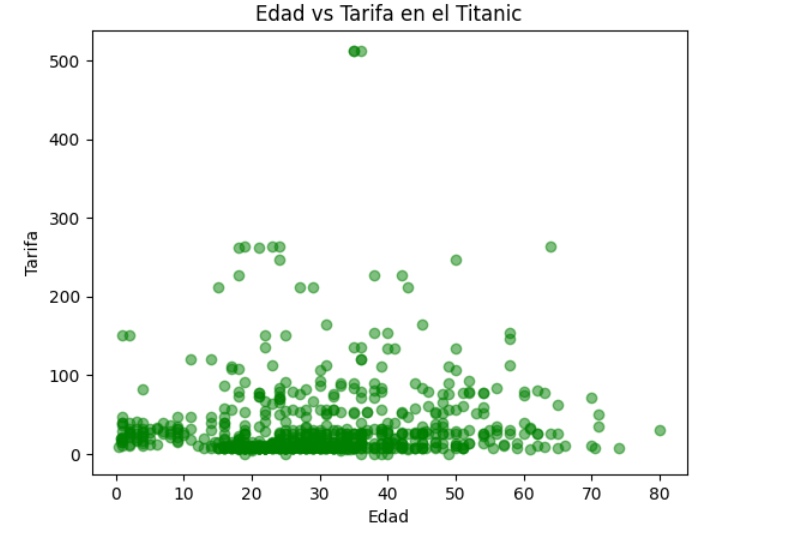

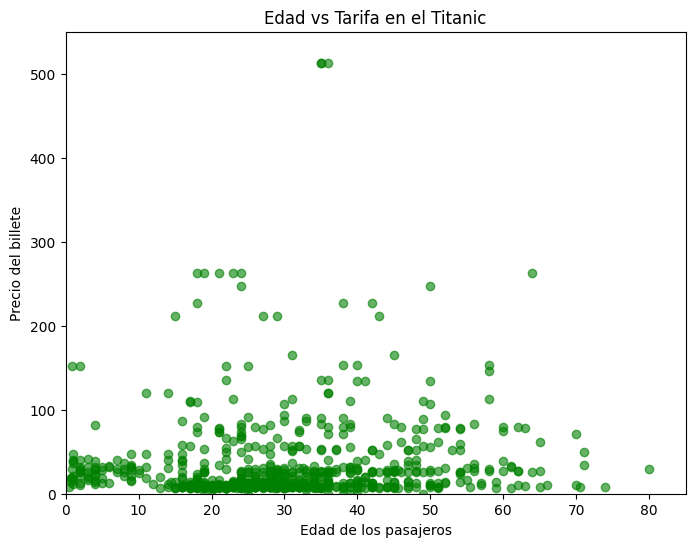

In [52]:
# Extraer las columnas "age" y "fare" del dataframe
age = df_titanic["age"]  # Edad, eliminando valores NaN
fare = df_titanic.loc[age.index, "fare"]  # Precio del billete (sin valores NaN)

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(age, fare, color="green", marker="o", alpha=0.6)  # Marcadores verdes con transparencia
plt.title("Edad vs Tarifa en el Titanic")
plt.xlabel("Edad de los pasajeros")
plt.ylabel("Precio del billete")
plt.xlim(0, 85)  # Limitar el rango del eje x
plt.ylim(0, 550)  # Limitar el rango del eje y
#plt.grid(alpha=0.4)  # Cuadrícula con transparencia

# Mostrar el gráfico
plt.show()

### Ejercicio 7

Vamos a obtener el precio medio por edad, de la siguiente forma agrupa por edad y calcula la media de la tarifa, luego haz lo mismo pero calculando la desviación de estándar. Guarda los resultados en dos variables distintas.

In [ ]:
# Agrupar por edad y calcular el precio medio
precio_medio_por_edad = df_titanic.groupby("age")["fare"].mean()

# Agrupar por edad y calcular la desviación estándar del precio
desviacion_estandar_por_edad = df_titanic.groupby("age")["fare"].std()


### Ejercicio 8

Considerando las medias como un conjunto de medidas y las desviaciones como el error de las mismas construye un diagrama de errores que reproduzca la siguiente figura, usando (£) como moneda:

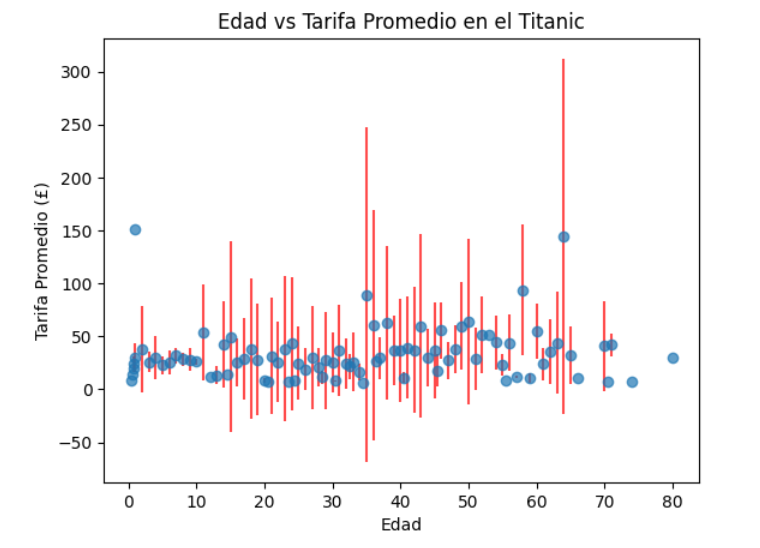

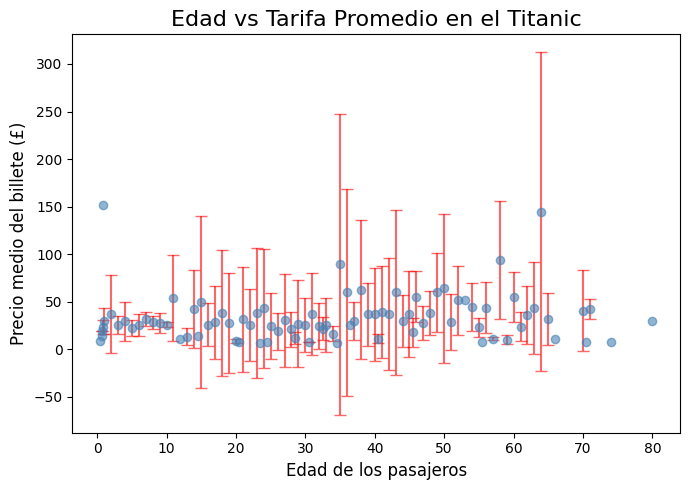

In [65]:
# Supongamos que ya calculaste las medias y desviaciones estándar
# precio_medio_por_edad y desviacion_estandar_por_edad son las variables calculadas previamente
ages = precio_medio_por_edad.index  # Las edades como eje x
mean_prices = precio_medio_por_edad.values  # Las medias como medidas
std_dev_prices = desviacion_estandar_por_edad.values  # Las desviaciones como errores

# Crear el diagrama de errores
plt.figure(figsize=(7, 5))
plt.errorbar(ages, mean_prices, yerr=std_dev_prices, fmt='o', color="steelblue", alpha = 0.6, ecolor="red", elinewidth=1.5, capsize=4)
plt.title("Edad vs Tarifa Promedio en el Titanic", fontsize=16)
plt.xlabel("Edad de los pasajeros", fontsize=12)
plt.ylabel("Precio medio del billete (£)", fontsize=12)
#plt.grid(alpha=0.4)  # Cuadrícula ligera para mayor claridad
plt.tight_layout()

# Mostrar el gráfico
plt.show()

EXTRA: Pinta los cuatro primeros gráficos conjuntamente en una sóla figura como la que ves a continuación:

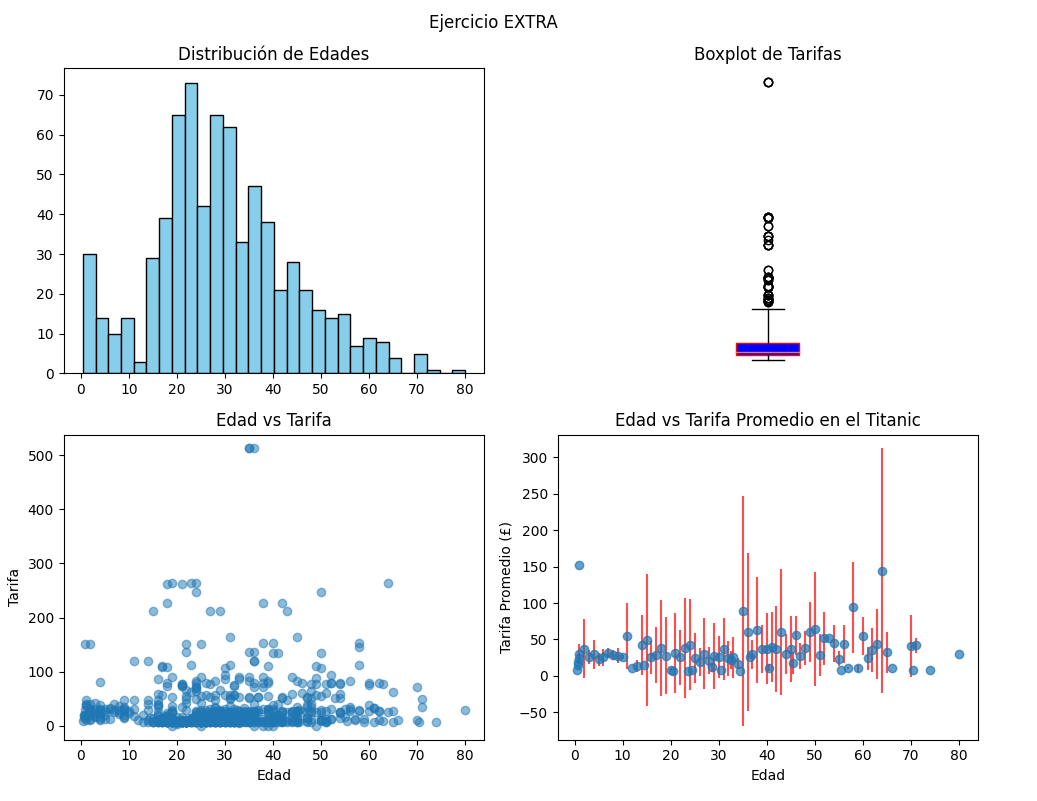

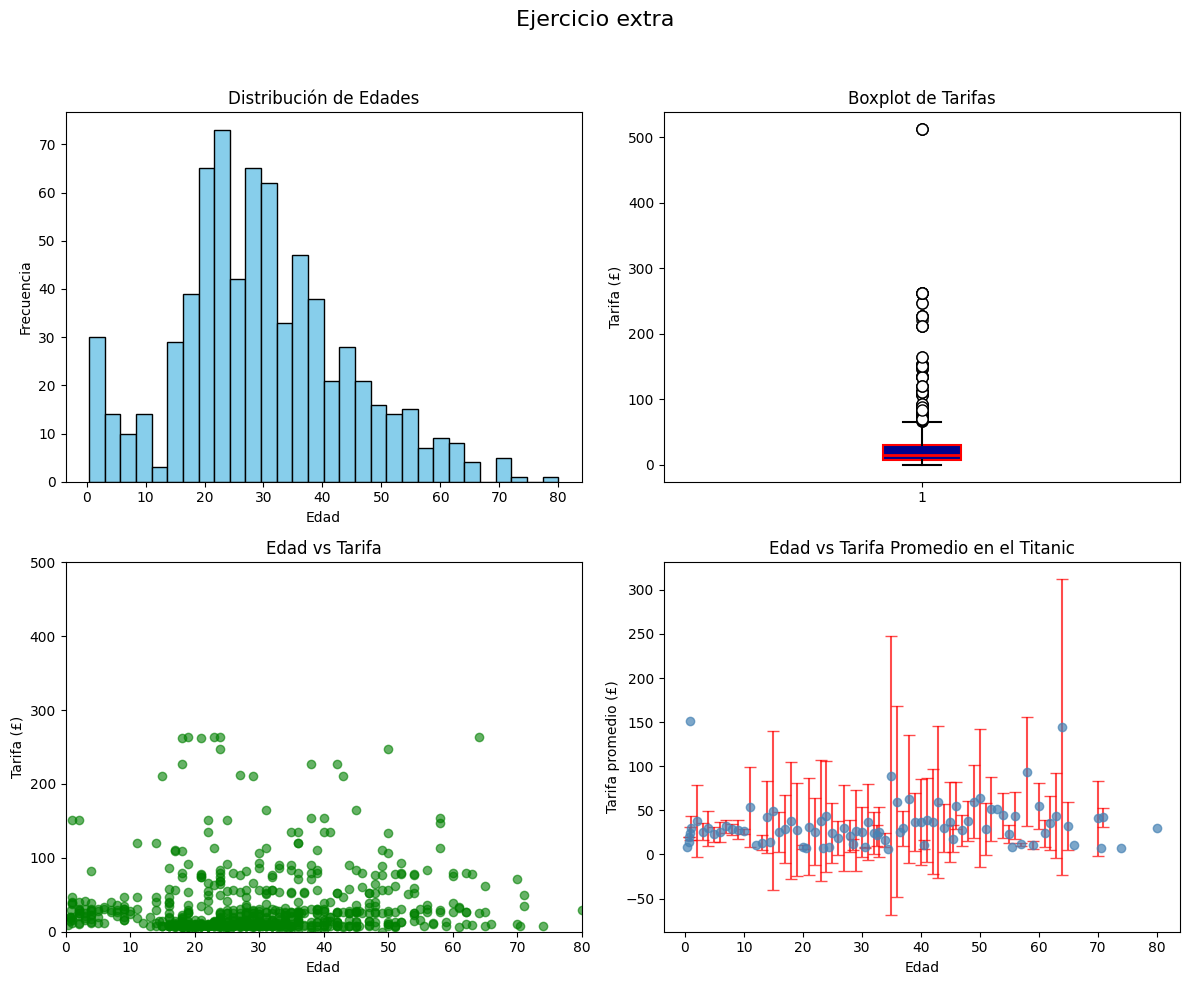

In [80]:
# Extraer datos del dataframe
ages = df_titanic["age"]
fare = df_titanic["fare"]
absolute_frequencies = df_titanic["embark_town"].value_counts()
relative_frequencies = df_titanic["embark_town"].value_counts(normalize=True) * 100
precio_medio_por_edad = df_titanic.groupby("age")["fare"].mean()
desviacion_estandar_por_edad = df_titanic.groupby("age")["fare"].std()

# Crear figura y axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Ejercicio extra", fontsize=16)

# Gráfico 1: Histograma (Distribución de edades)
axes[0, 0].hist(ages, bins=30, color="skyblue", edgecolor="black")
axes[0, 0].set_title("Distribución de Edades")
axes[0, 0].set_xlabel("Edad")
axes[0, 0].set_ylabel("Frecuencia")

# Gráfico 2: Diagrama de caja (Boxplot de tarifas)
box = axes[0, 1].boxplot(fare, 
                  patch_artist=True,  # Permitir personalización del color de la caja
                  flierprops={"marker": "o", "markersize": 8, "markerfacecolor": "white", "markeredgecolor" : "black"},
                  whiskerprops={"color": "black", "linewidth": 1.5}, 
                  capprops={"color": "black", "linewidth": 1.5},
                  boxprops={"facecolor": "darkblue", "edgecolor": "red", "linewidth" : 1.5, "color": "red"},
                  medianprops={"color": "red", "linewidth": 2})
axes[0, 1].set_title("Boxplot de Tarifas")
axes[0, 1].set_ylabel("Tarifa (£)")

# Gráfico 3: Gráfico de dispersión (Edad vs Tarifa)
axes[1, 0].scatter(ages, fare, color="green", alpha=0.6, marker="o")
axes[1, 0].set_title("Edad vs Tarifa")
axes[1, 0].set_xlabel("Edad")
axes[1, 0].set_ylabel("Tarifa (£)")
axes[1, 0].set_xlim(0, 80)
axes[1, 0].set_ylim(0, 500)

# Gráfico 4: Diagrama de errores (Promedio por edad)
axes[1, 1].errorbar(precio_medio_por_edad.index, precio_medio_por_edad.values, 
                    yerr=desviacion_estandar_por_edad.values, fmt='o', color="steelblue", alpha = 0.7, 
                    ecolor="red", elinewidth=1.5, capsize=4)
axes[1, 1].set_title("Edad vs Tarifa Promedio en el Titanic")
axes[1, 1].set_xlabel("Edad")
axes[1, 1].set_ylabel("Tarifa promedio (£)")

# Ajustar diseño para evitar superposición
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()